In [152]:
import numpy as np
import pandas as pd

In [153]:
# import nltk
# nltk.download('punkt')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
# from nltk.tokenize import word_tokenize

In [154]:
data=pd.read_csv('drugs1.csv')

In [155]:
data.isnull().sum()

key      0
class    0
dtype: int64

In [156]:
data = data.sample(frac = 1)

In [157]:
data.head(20)

,key,class
90,street children were seen smoking ganja,1
39,heroin,1
38,they were trying to hide away,1
29,unconscious,1
64,risky location,1
154,candid,0
104,self prescribed medicines,1
183,clerk,0
176,force,0
43,they were fighting,1


In [158]:
train_size = int(data.shape[0]*0.9)
X_train = data['key'][:train_size]
y_train = data['class'][:train_size]
X_test = data['key'][train_size:]
y_test = data['class'][train_size:]

In [159]:
vocab_size = 1000
max_length = 70
embedding_dim = 16

In [160]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token="<OOV>")

tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences,maxlen=max_length, truncating='post')

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length,truncating='post')

In [161]:
training_padded.shape

(189, 70)

In [162]:
testing_padded.shape

(22, 70)

# Neural network for binary classification using LSTM

In [163]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 70, 16)            16000     
                                                                 
 bidirectional_10 (Bidirecti  (None, 70, 128)          41472     
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 102,913
Trainable params: 102,913
Non-tr

In [164]:
NUM_EPOCHS = 20

# Train the model
history = model.fit(training_padded,y_train, epochs=NUM_EPOCHS, validation_data=(testing_padded,y_test))

Epoch 1/20
6/6 [==============================] - 5s 272ms/step - loss: 0.6956 - accuracy: 0.4974 - val_loss: 0.6921 - val_accuracy: 0.5455
Epoch 2/20
6/6 [==============================] - 0s 44ms/step - loss: 0.6933 - accuracy: 0.4868 - val_loss: 0.6933 - val_accuracy: 0.3182
Epoch 3/20
6/6 [==============================] - 0s 47ms/step - loss: 0.6936 - accuracy: 0.5026 - val_loss: 0.6944 - val_accuracy: 0.4545
Epoch 4/20
6/6 [==============================] - 0s 40ms/step - loss: 0.6909 - accuracy: 0.5979 - val_loss: 0.6930 - val_accuracy: 0.4091
Epoch 5/20
6/6 [==============================] - 0s 44ms/step - loss: 0.6887 - accuracy: 0.6614 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 6/20
6/6 [==============================] - 0s 36ms/step - loss: 0.6836 - accuracy: 0.6878 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 7/20
6/6 [==============================] - 0s 47ms/step - loss: 0.6704 - accuracy: 0.7460 - val_loss: 0.6828 - val_accuracy: 0.6364
Epoch 8/20
6/6 [==========

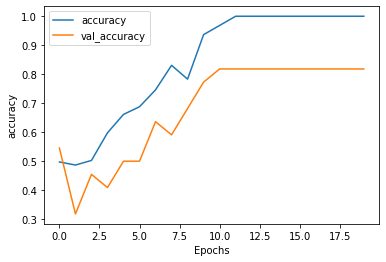

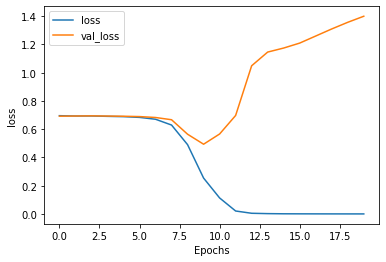

In [165]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [166]:
text4 = "Here in lucknow narcotic and steroids drugs are being trafficked in gomti nagar"
data4 = [text4]
data4=tokenizer.texts_to_sequences(data4)
data4=pad_sequences(data4,maxlen=max_length,truncating='post')
prediction4 = model.predict(data4)
print(prediction4)
if prediction4 > 0.5: #threshold value for sigmoid activation
    print("It is a Genuine Reason")
else:
    print("It is Not a Genuine Reason")

[[0.9996106]]
It is a Genuine Reason


In [167]:
text4 = "afrin muskan kailash ritik vishnu"
data4 = [text4]
data4=tokenizer.texts_to_sequences(data4)
data4=pad_sequences(data4,maxlen=max_length,truncating='post')
prediction4 = model.predict(data4)
print(prediction4)
if prediction4 > 0.5: #threshold value for sigmoid activation
    print("It is a Genuine Reason")
else:
    print("It is Not a Genuine Reason")

[[0.00035964]]
It is Not a Genuine Reason


In [168]:
text4 = "you won 100rs in the game"
data4 = [text4]
data4=tokenizer.texts_to_sequences(data4)
data4=pad_sequences(data4,maxlen=max_length,truncating='post')
prediction4 = model.predict(data4)
print(prediction4)
if prediction4 > 0.5: #threshold value for sigmoid activation
    print("It is a Genuine Reason")
else:
    print("It is Not a Genuine Reason")

[[0.00044205]]
It is Not a Genuine Reason


In [169]:
text2 = "In Gorakhpur the students are taking the very addictive drugs to win the sports events very easily for there college"
data2 = [text2]
data2=tokenizer.texts_to_sequences(data2)
data2=pad_sequences(data2,maxlen=max_length,truncating='post')
prediction2 = model.predict(data2)
print(prediction2)
if prediction2 > 0.5: #threshold value for sigmoid activation
    print("It is a Genuine Reason")
else:
    print("It is Not a Genuine Reason")

[[0.0003037]]
It is Not a Genuine Reason


In [170]:
text2 = "I've been searching for the right words to thank you for this breathe"
data2 = [text2]
data2=tokenizer.texts_to_sequences(data2)
data2=pad_sequences(data2,maxlen=max_length,truncating='post')
prediction2 = model.predict(data2)
print(prediction2)
if prediction2 > 0.5: #threshold value for sigmoid activation
    print("It is a Genuine Reason")
else:
    print("It is Not a Genuine Reason")

[[0.00026493]]
It is Not a Genuine Reason


# Random Forest classifier

In [171]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [172]:
x=data['key']
y=data['class']
cv=CountVectorizer()
x = cv.fit_transform(x)

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x.toarray(), y, test_size=0.12, random_state=42)

In [174]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(x_train,y_train)

RandomForestClassifier()

In [175]:
print("The score for Random Forest classifier model over the given data is ",model2.score(x_test,y_test)*100)

The score for Random Forest classifier model over the given data is  84.61538461538461


In [176]:
text2 = "In Gorakhpur the students are taking the very addictive drugs to win the sports events very easily for there college"
data2 = [text2]
data2=cv.transform(data2).toarray()
prediction2 = model2.predict(data2)
predict_score2=model2.predict_proba(data2)
if prediction2[0] == 1:
    print("It is a Genuine Reason with ",predict_score2[0][1]*100,"% probabulity")
else:
    print("It is Not a Genuine Reason with ",predict_score2[0][0]*100,"% proabulity")

It is a Genuine Reason with  76.0 % probabulity


In [177]:
text2 = "Here in lucknow narcotic and steroids drugs are being trafficked in gomti nagar"
data2 = [text2]
data2=cv.transform(data2).toarray()
prediction2 = model2.predict(data2)
predict_score2=model2.predict_proba(data2)
if prediction2[0] == 1:
    print("It is a Genuine Reason with ",predict_score2[0][1]*100,"% probabulity")
else:
    print("It is Not a Genuine Reason with ",predict_score2[0][0]*100,"% proabulity")

It is a Genuine Reason with  93.0 % probabulity


In [178]:
text2 = "afrin muskan kailash ritik vishnu"
data2 = [text2]
data2=cv.transform(data2).toarray()
prediction2 = model2.predict(data2)
predict_score2=model2.predict_proba(data2)
if prediction2[0] == 1:
    print("It is a Genuine Reason with ",predict_score2[0][1]*100,"% probabulity")
else:
    print("It is Not a Genuine Reason with ",predict_score2[0][0]*100,"% proabulity")

It is Not a Genuine Reason with  91.0 % proabulity


In [179]:
text2 = "I've been searching for the right words to thank you for this breathe"
data2 = [text2]
data2=cv.transform(data2).toarray()
prediction2 = model2.predict(data2)
predict_score2=model2.predict_proba(data2)
if prediction2[0] == 1:
    print("It is a Genuine Reason with ",predict_score2[0][1]*100,"% probabulity")
else:
    print("It is Not a Genuine Reason with ",predict_score2[0][0]*100,"% proabulity")

It is Not a Genuine Reason with  88.0 % proabulity
